# Trablho de Conclusão de Curso - UNIVESP - 1S/2025- Notebook 3

# Código: tcc530-sala-002grupo-002

## 1.0 Packges

### Packges Import

In [1]:
# Bibliotecas Gerais
import numpy                   as np
import pandas                  as pd
import matplotlib.pyplot       as plt

# Bibliotecas Classificação
from sklearn.model_selection       import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn                       import metrics
from sklearn.preprocessing         import MinMaxScaler
from sklearn.neighbors             import KNeighborsClassifier
from sklearn.linear_model          import LogisticRegression
from sklearn.tree                  import DecisionTreeClassifier
from sklearn.ensemble              import RandomForestClassifier
from sklearn.metrics               import accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics               import classification_report
from sklearn.metrics               import ConfusionMatrixDisplay
from sklearn.metrics               import RocCurveDisplay
from sklearn.metrics               import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection       import cross_val_score,cross_val_predict

### Packges Version Control

In [2]:
pip freeze --local > ../requeriments_not3.txt

Note: you may need to restart the kernel to use updated packages.


## 2.0 Data Read

In [3]:
link   = '../dados/dados_class.csv'
df_class = pd.read_csv(link,sep=",",low_memory=False)

In [4]:
df_class.head(5)

,Código do sexo_Feminino,Código do sexo_Masculino,Código do sexo_Sem Registro,Código da raça/cor_Amarela,Código da raça/cor_Branca,Código da raça/cor_Indígena,Código da raça/cor_Parda,Código da raça/cor_Preta,Código da raça/cor_Sem Registro,Código de escolaridade_1ª a 4ª série incompleta do EF,...,Manifestação de petéquias_Sim,Manifestação de hematúria_Não,Manifestação de hematúria_Não Realizado,Manifestação de hematúria_Sem Registro,Manifestação de hematúria_Sim,Manifestação de sangramento_Não,Manifestação de sangramento_Não Realizado,Manifestação de sangramento_Sem Registro,Manifestação de sangramento_Sim,Classificação final do caso
0,False,True,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,True,False,1
1,True,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,0
2,False,True,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,0
3,True,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,1
4,False,True,False,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,True,False,0


In [5]:
locsave = 'figures/class/'

## 3.0 Data Preparing

In [6]:
factor = 0.15
df     = df_class.sample(int(factor*df_class.shape[0]))

In [7]:
X = df.drop(columns=["Classificação final do caso"])
Y = df["Classificação final do caso"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)
print(f"Shape X_train: {X_train.shape}")
print(f"Shape y_train: {y_train.shape}")
print(f"Shape X_test: {X_test.shape}")
print(f"Shape y_test: {y_test.shape}")

Shape X_train: (503598, 206)
Shape y_train: (503598,)
Shape X_test: (125900, 206)
Shape y_test: (125900,)


## 4.0 ML Models

In [9]:
models = {
    'RandomForestClassifier': RandomForestClassifier(criterion='entropy', n_estimators=150),
}

### 4.1 Traning 1 - Test/Train Split

RandomForestClassifier
F1: 79.02542645512925%
              precision    recall  f1-score   support

           0       0.81      0.67      0.74     50737
           1       0.80      0.89      0.85     75163

    accuracy                           0.80    125900
   macro avg       0.81      0.78      0.79    125900
weighted avg       0.81      0.80      0.80    125900



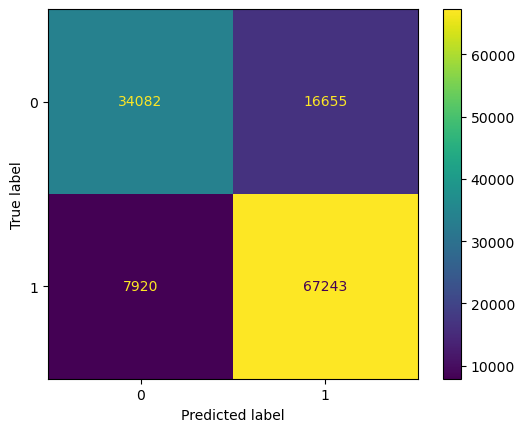

In [10]:
f1score_list    = []
clf_list        = []

for name, model in models.items():

  clf = model
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)

  f1score   = np.mean(f1_score(y_test, y_pred,average=None))*100
  f1score_list.append(f1score)
  
  clf_list.append(name)
    
  print(name)
  print(f"F1: {f1score}%")
  print(classification_report(y_test, y_pred))

  cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
  disp.plot()    
  plt.grid(False)
  plt.show()

In [11]:
df_metricas = pd.DataFrame({'Classificador': clf_list, 'F1-Score': f1score_list})

In [12]:
df_metricas.sort_values(by='F1-Score', ascending=False)

,Classificador,F1-Score
0,RandomForestClassifier,79.025426


### 4.2 Traning 2 - Cross Validation

In [13]:
f1score_list    = []
clf_list        = []
cv_number       = 5 

for name, model in models.items():

  clf = model
  scores = cross_val_score(clf,X,Y,cv=cv_number,scoring='f1_macro')
  clf_list.append(name)
  f1score = scores.mean()
  f1score_list.append(100*f1score)
 
  print(name)
  print(f"F1: {100*f1score}%")

RandomForestClassifier
F1: 79.0538092760994%


In [14]:
df_metricas_cv = pd.DataFrame({'Classificador': clf_list, 'F1-Score': f1score_list})

In [15]:
df_metricas_cv.sort_values(by='F1-Score', ascending=False)

,Classificador,F1-Score
0,RandomForestClassifier,79.053809


### 4.3 Hyperparamerization

In [16]:
n_estimators      = [100, 300, 500, 800, 1200]
max_depth         = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf  = [1, 2, 5, 10] 
hyperparam        = dict(n_estimators = n_estimators, max_depth = max_depth, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)

In [17]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(rf,hyperparam, cv = 5, verbose = 1, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 8, 15, 25, 30],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 300, 500, 800,
                                                         1200]},
                   verbose=1)

In [18]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 25}

In [19]:
base_model = RandomForestClassifier(criterion='entropy', n_estimators=150)
base_model.fit(X_train,y_train)
y_pred     = base_model.predict(X_test)
f1score    = np.mean(f1_score(y_test, y_pred,average=None))*100
print(f"F1: {f1score}%")
print(classification_report(y_test, y_pred))

F1: 79.11860739638253%
              precision    recall  f1-score   support

           0       0.81      0.67      0.74     50737
           1       0.80      0.89      0.85     75163

    accuracy                           0.81    125900
   macro avg       0.81      0.78      0.79    125900
weighted avg       0.81      0.81      0.80    125900



In [20]:
best_random = rf_random.best_estimator_
best_random.fit(X_train,y_train)
y_pred     = best_random.predict(X_test)
f1score    = np.mean(f1_score(y_test, y_pred,average=None))*100
print(f"F1: {f1score}%")
print(classification_report(y_test, y_pred))

F1: 79.73935624859064%
              precision    recall  f1-score   support

           0       0.84      0.66      0.74     50737
           1       0.80      0.92      0.85     75163

    accuracy                           0.81    125900
   macro avg       0.82      0.79      0.80    125900
weighted avg       0.82      0.81      0.81    125900

